In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

import seffaflik
from seffaflik.elektrik import santraller, tuketim, uretim, yekdem


In [4]:
seffaflik.Kimlik(istemci_taniticisi="berkay")

In [5]:
df_prod = uretim.gerceklesen(baslangic_tarihi='2021-06-01', bitis_tarihi='2021-06-15')

In [6]:
df_prod.columns

Index(['Tarih', 'Saat', 'Doğalgaz', 'Barajlı', 'Linyit', 'Akarsu',
       'İthal Kömür', 'Rüzgar', 'Güneş', 'Fuel Oil', 'Jeo Termal',
       'Asfaltit Kömür', 'Taş Kömür', 'Biyokütle', 'Nafta', 'LNG',
       'Uluslararası', 'Toplam'],
      dtype='object')

In [28]:
vars_to_use = ['Toplam', 'Rüzgar', 'Güneş', 'Taş Kömür', 'Doğalgaz']

In [29]:
df_set = df_prod[vars_to_use]

In [30]:
df_set = df_set.rename(columns={'Toplam': 'total production',
                                'Rüzgar': 'wind production',
                                'Güneş': 'solar production', 
                                'Taş Kömür': 'coal production',
                                'Doğalgaz': 'natural gas production'})

In [31]:
df_set.describe()

,total production,wind production,solar production,coal production,natural gas production
count,360.000000,360.000000,360.000000,360.000000,360.000000
mean,33586.921389,2018.113667,228.447389,448.045722,12831.107250
std,3639.801014,891.356838,238.630532,19.474946,1821.258414
min,25007.690000,347.350000,0.000000,386.320000,7789.140000
25%,30220.120000,1338.610000,0.000000,434.552500,11658.980000
50%,34531.550000,1849.730000,134.880000,452.590000,13059.850000
75%,36693.480000,2725.252500,490.030000,463.710000,14365.132500
max,39047.000000,4319.960000,610.040000,481.200000,15776.460000


In [32]:
# not much potential linear relation except natural gas-total
df_set.corr()

,total production,wind production,solar production,coal production,natural gas production
total production,1.000000,0.363616,0.141740,-0.126428,0.709280
wind production,0.363616,1.000000,-0.225318,0.090458,0.023828
solar production,0.141740,-0.225318,1.000000,-0.105741,-0.043347
coal production,-0.126428,0.090458,-0.105741,1.000000,0.125874
natural gas production,0.709280,0.023828,-0.043347,0.125874,1.000000


In [33]:
df_set.isna().sum()

total production          0
wind production           0
solar production          0
coal production           0
natural gas production    0
dtype: int64

<AxesSubplot:xlabel='natural gas production'>

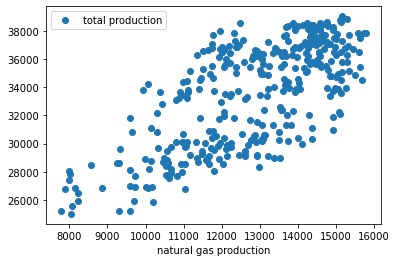

In [34]:
df_set.plot(x='natural gas production', y='total production', style='o')

In [35]:
df_set.columns

Index(['total production', 'wind production', 'solar production',
       'coal production', 'natural gas production'],
      dtype='object')

In [55]:
df_set.head(2)

,total production,wind production,solar production,coal production,natural gas production
0,33292.52,1827.73,0.0,396.38,12671.91
1,31811.94,1818.45,0.0,403.05,12308.50


In [63]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_set)

In [66]:
df_set.columns

Index(['total production', 'wind production', 'solar production',
       'coal production', 'natural gas production'],
      dtype='object')

In [47]:
target_column = ['total production']
var_column = [col for col in df_set.columns if 'total' not in col]

In [69]:
X = df_norm[:,1:].reshape(-1,len(var_column))
y = df_norm[:,0].reshape(-1,len(target_column))

In [70]:
print(X.shape)
print(y.shape)

(360, 4)
(360, 1)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [73]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [77]:
print(regressor.coef_)
print(regressor.intercept_)

[[ 0.48630088  0.16837837 -0.28361534  0.83135112]]
[0.00512643]


In [79]:
y_pred = regressor.predict(X_test)

In [89]:
df_model = pd.DataFrame({'y_test':y_test.flatten(),
                        'y_pred':y_pred.flatten()})

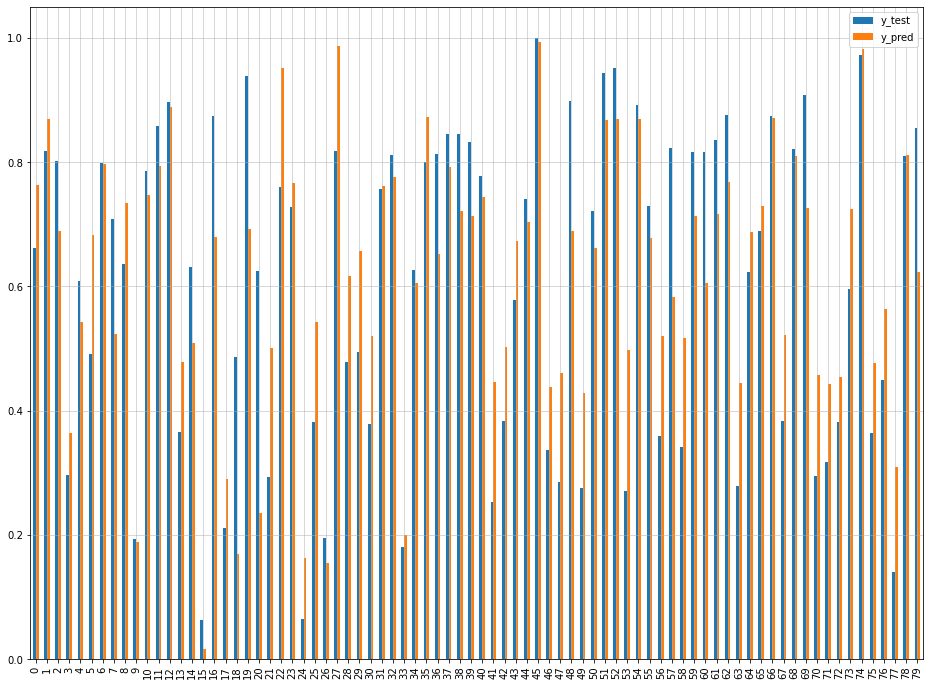

In [91]:
df_model.plot(kind='bar', figsize=(16,12))
plt.grid(which='major', linestyle='-', linewidth=0.5)
plt.show()

In [93]:
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11198758520409602
MSE: 0.018531377226197195
RMSE: 0.13613000119810914
